# Code for generating the selectivity map

This notebook shows the code for generating the initial plot that gives rise to the selectivity map. The `zeolites.csv` contains the largest ring size for most zeolites from IZA, and the `osdas.json` file has the selected OSDAs for each zeolite.

## Global variables and imports

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use("./paper.mplstyle")
pd.options.mode.chained_assignment = None

In [2]:
DATA_URL = "https://raw.githubusercontent.com/learningmatter-mit/Zeolite-Phase-Competition/main/data/binding.csv"

df = pd.read_csv(DATA_URL, index_col=0)
zeo = pd.read_csv('zeolites.csv', index_col=0)

with open("./osdas.json", "r") as f:
    ZEO_OSDAS = json.load(f)

In [3]:
PALETTE = {
    'yellow': (235, 172, 35, 255),
    'lipstick': (184, 0, 88, 255),
    'azure': (0, 140, 249, 255),
    'green': (0, 110, 0, 255),
    'caribbean': (0, 187, 173, 255),
    'lavender': (209, 99, 230, 255),
    'brown': (178, 69, 2, 255),
    'coral': (255, 146, 135, 255),
    'indigo': (89, 84, 214, 255),
    'turquoise': (0, 198, 248, 255),
    'olive': (135, 133, 0, 255),
    'jade': (0, 167, 108, 255),
    'gray': (189, 189, 189, 255),
}

## Small-pore zeolites

In [4]:
subst_colors = {
    'AEI': 'azure',
    'AFX': 'indigo',
    'CHA': 'lipstick',
    'ERI': 'green',
    'LEV': 'olive',
    'LTA': 'lavender',
    'RTH': 'yellow',
    'SWY': 'caribbean',
    'SFW': 'coral',
}

In [5]:
idx = set(ZEO_OSDAS["8MR"].keys())

sdf = df.loc[df.Zeolite.isin(idx)]
minidx = sdf.groupby('SMILES').idxmin()['Binding (SiO2)']
mindf = sdf.loc[minidx]

submin = mindf.loc[
    mindf["Zeolite"].isin(subst_colors.keys())
    & (mindf["Axis 1 (Angstrom)"] <= 16)
    & (mindf["Axis 2 (Angstrom)"] <= 10)
]

/tmp/ipykernel_14658/2291893285.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minidx = sdf.groupby('SMILES').idxmin()['Binding (SiO2)']


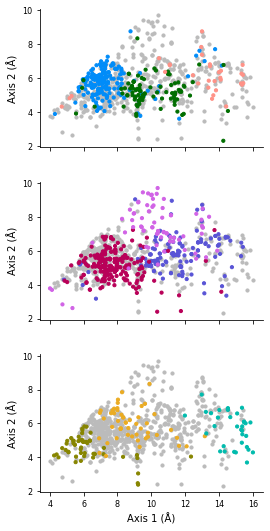

In [6]:
fig, ax_fig = plt.subplots(3, 1, figsize=(4, 9), sharex=True)

groups = [['AEI', 'ERI', 'SFW'], ['CHA', 'LTA', 'AFX'], ['LEV', 'RTH', 'SWY']]

for ax, grp in zip(ax_fig, groups):
    ingrp = submin.loc[submin.Zeolite.isin(grp)]
    notingrp = submin.loc[~submin.Zeolite.isin(grp)]
    
    ax.scatter(
        notingrp["Axis 1 (Angstrom)"],
        notingrp["Axis 2 (Angstrom)"],
        c='#bbbbbb',
        s=10,
    )
    
    for z, s in ingrp.groupby('Zeolite'):
        c = np.array(PALETTE[subst_colors[z]]) * np.ones((len(s), 1)) / 255

        ax.scatter(
            s["Axis 1 (Angstrom)"],
            s["Axis 2 (Angstrom)"],
            c=c,
            s=10,
        )
    
    ax.set_aspect('equal')

for ax in ax_fig:
    ax.set_ylabel("Axis 2 (Å)")

ax_fig[-1].set_xlabel("Axis 1 (Å)")

plt.show()

## Medium pore zeolites

In [7]:
subst_colors = {
    'CSV': 'azure',
    'EUO': 'indigo',
    'MWW': 'lipstick',
    'SFF': 'green',
    'SFG': 'olive',
    'STI': 'lavender',
}

In [8]:
idx = set(ZEO_OSDAS["10MR"].keys())

sdf = df.loc[df.Zeolite.isin(idx)]
minidx = sdf.groupby('SMILES').idxmin()['Binding (SiO2)']
mindf = sdf.loc[minidx]

submin = mindf.loc[
    mindf["Zeolite"].isin(subst_colors.keys())
    & (mindf["Axis 1 (Angstrom)"] <= 16)
    & (mindf["Axis 2 (Angstrom)"] <= 10)
]

/tmp/ipykernel_14658/3476397970.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minidx = sdf.groupby('SMILES').idxmin()['Binding (SiO2)']


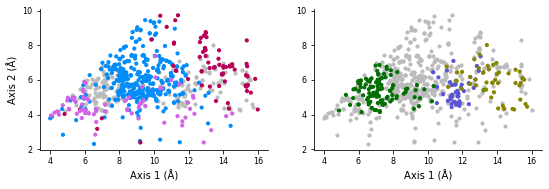

In [9]:
fig, ax_fig = plt.subplots(1, 2, figsize=(9, 4), sharex=True)

groups = [['CSV', 'STI', 'MWW'], ['SFF', 'SFG', 'EUO']]

for ax, grp in zip(ax_fig, groups):
    ingrp = submin.loc[submin.Zeolite.isin(grp)]
    notingrp = submin.loc[~submin.Zeolite.isin(grp)]
    
    ax.scatter(
        notingrp["Axis 1 (Angstrom)"],
        notingrp["Axis 2 (Angstrom)"],
        c='#bbbbbb',
        s=10,
    )
    
    for z, s in ingrp.groupby('Zeolite'):
        c = np.array(PALETTE[subst_colors[z]]) * np.ones((len(s), 1)) / 255

        ax.scatter(
            s["Axis 1 (Angstrom)"],
            s["Axis 2 (Angstrom)"],
            c=c,
            s=10,
        )
    
    ax.set_aspect('equal')

for ax in ax_fig:
    ax.set_xlabel("Axis 1 (Å)")

ax_fig[0].set_ylabel("Axis 2 (Å)")

plt.show()

## Large pore zeolites

In [10]:
subst_colors = {
    'AFY': 'azure',
    'BEA': 'green',
    'BEC': 'lipstick',
    'BPH': 'indigo',
    'ISV': 'olive',
    'IWR': 'lavender',
    'SAO': 'yellow',
    'SSF': 'coral',
    'MEI': 'caribbean',
}

In [11]:
idx = set(ZEO_OSDAS["12MR"].keys())

sdf = df.loc[df.Zeolite.isin(idx)]
minidx = sdf.groupby('SMILES').idxmin()['Binding (SiO2)']
mindf = sdf.loc[minidx]

submin = mindf.loc[
    mindf["Zeolite"].isin(subst_colors.keys())
    & (mindf["Axis 1 (Angstrom)"] <= 25)
    & (mindf["Axis 2 (Angstrom)"] <= 12)
]

/tmp/ipykernel_14658/804053376.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minidx = sdf.groupby('SMILES').idxmin()['Binding (SiO2)']


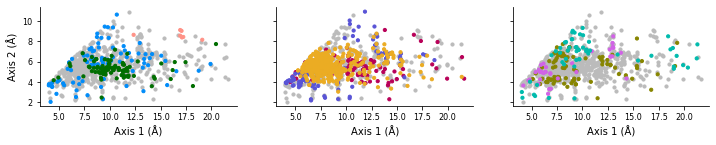

In [12]:
fig, ax_fig = plt.subplots(1, 3, figsize=(12, 5), sharex=True, sharey=True)

groups = [['AFY', 'BEA', 'SSF'], ['SAO', 'BPH', 'BEC'], ['ISV', 'IWR', 'MEI']]

for ax, grp in zip(ax_fig, groups):
    ingrp = submin.loc[submin.Zeolite.isin(grp)]
    notingrp = submin.loc[~submin.Zeolite.isin(grp)]
    
    ax.scatter(
        notingrp["Axis 1 (Angstrom)"],
        notingrp["Axis 2 (Angstrom)"],
        c='#bbbbbb',
        s=10,
    )
    
    for z, s in ingrp.groupby('Zeolite'):
        c = np.array(PALETTE[subst_colors[z]]) * np.ones((len(s), 1)) / 255

        ax.scatter(
            s["Axis 1 (Angstrom)"],
            s["Axis 2 (Angstrom)"],
            c=c,
            s=10,
        )
    
    ax.set_aspect('equal')

for ax in ax_fig:
    ax.set_xlabel("Axis 1 (Å)")

ax_fig[0].set_ylabel("Axis 2 (Å)")

plt.show()